In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

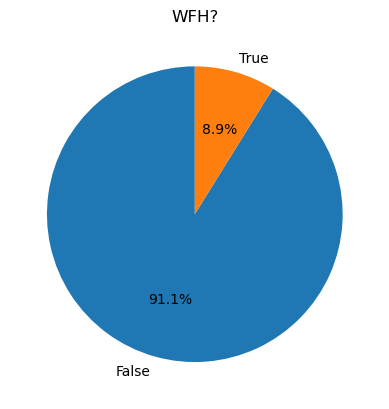

In [14]:
df['job_work_from_home'].value_counts().plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    title='WFH?',
    ylabel=''
)
plt.show()

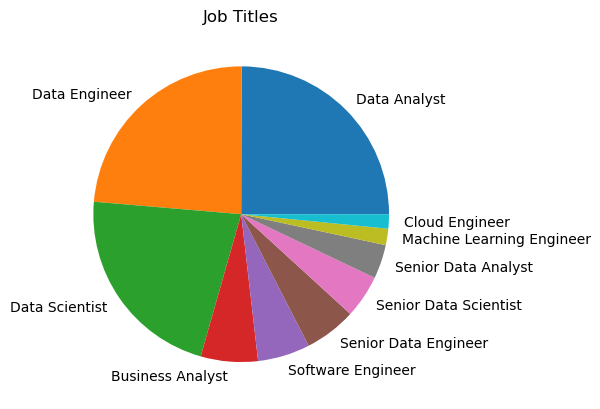

In [8]:
df['job_title_short'].value_counts().plot(
    kind='pie',
    title='Job Titles',
    ylabel=''
)
plt.show()

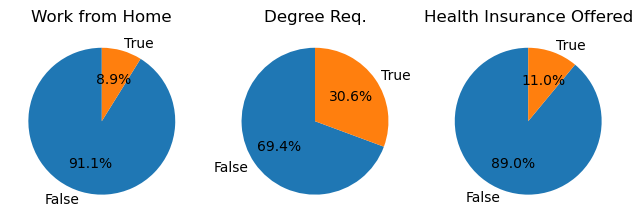

In [26]:
fg, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()